<a href="https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/LSTM_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#@title Check GPU

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [18]:
#@title Version Info
print('tf version: ', tf.__version__)
print('tf.keras version:', tf.keras.__version__)


tf version:  2.3.1
tf.keras version: 2.4.0


#References:
[tf.keras.layers.LSTM official website](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)

[The base example](https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/)

[My Presentation in PPT format]()


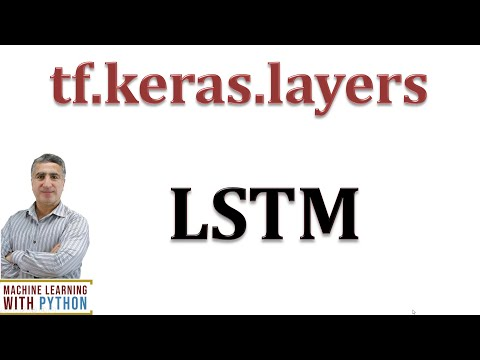

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('7nnSjZBJVDs', width=800, height=450)

In [20]:
#@title Import Libraries
from random import randint
from numpy import array
from numpy import argmax

from tensorflow.keras import models
from numpy import array_equal
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector

In [21]:
#@title Generate one_hot_encoded Input & Output Sequences


# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

# prepare data for the LSTM
def get_pair(n_in, n_out, n_unique, verbose= False):
	# generate random sequence
	sequence_in = generate_sequence(n_in, n_unique)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, n_unique)
	y = one_hot_encode(sequence_out, n_unique)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))

	if(verbose):
		print('Generated sequences as follows')
		print('X.shape: ', X.shape,'y.shape: ', y.shape)
		print('\nSample X and y')
		print('\nIn raw format:')
		print('X=%s, y=%s' % (one_hot_decode(X[0]), one_hot_decode(y[0])))
		print('\nIn one_hot_encoded format:')
		print('X=%s' % (X[0]))
	return X,y

In [22]:
#@title Configure problem

n_timesteps_in = 4  #@param {type:"integer"}
#each input sample has 4 values

n_features = 10   #@param {type:"integer"}
#each value is one_hot_encoded with 10 0/1
n_timesteps_out = 2  #@param {type:"integer"}
#each output sample has 2 values padded with 0

# generate random sequence
X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features, verbose=True)

Generated sequences as follows
X.shape:  (1, 4, 10) y.shape:  (1, 4, 10)

Sample X and y

In raw format:
X=[0, 9, 9, 0], y=[0, 9, 0, 0]

In one_hot_encoded format:
X=[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


In [23]:
# define model
numberOfLSTMcells= 100

input =Input(shape=(n_timesteps_in, n_features))
output= LSTM(numberOfLSTMcells, return_sequences=True) (input)
model1 = Model(inputs=input, outputs=output)
model1.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4, 10)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 4, 100)            44400     
Total params: 44,400
Trainable params: 44,400
Non-trainable params: 0
_________________________________________________________________


In [24]:
#lstm, state_h, state_c

In [25]:
# define model
model = Sequential()
model.add(Input(shape=(n_timesteps_in, n_features)))
model.add(LSTM(150))
model.add(RepeatVector(n_timesteps_in))
model.add(LSTM(150, return_sequences=True))
model.add(TimeDistributed(Dense(n_features, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 150)               96600     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 4, 150)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 4, 150)            180600    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 10)             1510      
Total params: 278,710
Trainable params: 278,710
Non-trainable params: 0
_________________________________________________________________


In [26]:
# train LSTM
for epoch in range(500):
	# generate new random sequence
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, verbose=2)
	print(epoch,' finished...')

1/1 - 0s - loss: 2.3044 - accuracy: 0.0000e+00
0  finished...
1/1 - 0s - loss: 2.2888 - accuracy: 0.5000
1  finished...
1/1 - 0s - loss: 2.2890 - accuracy: 0.5000
2  finished...
1/1 - 0s - loss: 2.2573 - accuracy: 0.5000
3  finished...
1/1 - 0s - loss: 2.2698 - accuracy: 0.7500
4  finished...
1/1 - 0s - loss: 2.2618 - accuracy: 0.5000
5  finished...
1/1 - 0s - loss: 2.2439 - accuracy: 0.5000
6  finished...
1/1 - 0s - loss: 2.1746 - accuracy: 0.7500
7  finished...
1/1 - 0s - loss: 2.1867 - accuracy: 0.5000
8  finished...
1/1 - 0s - loss: 2.1795 - accuracy: 0.5000
9  finished...
1/1 - 0s - loss: 2.1407 - accuracy: 0.5000
10  finished...
1/1 - 0s - loss: 2.1186 - accuracy: 0.5000
11  finished...
1/1 - 0s - loss: 2.0853 - accuracy: 0.5000
12  finished...
1/1 - 0s - loss: 2.0391 - accuracy: 0.7500
13  finished...
1/1 - 0s - loss: 2.0374 - accuracy: 0.5000
14  finished...
1/1 - 0s - loss: 1.9744 - accuracy: 0.5000
15  finished...
1/1 - 0s - loss: 1.9339 - accuracy: 0.5000
16  finished...
1/1

138  finished...
1/1 - 0s - loss: 1.2395 - accuracy: 0.5000
139  finished...
1/1 - 0s - loss: 0.6195 - accuracy: 1.0000
140  finished...
1/1 - 0s - loss: 1.1605 - accuracy: 0.7500
141  finished...
1/1 - 0s - loss: 1.1970 - accuracy: 0.5000
142  finished...
1/1 - 0s - loss: 0.8328 - accuracy: 0.7500
143  finished...
1/1 - 0s - loss: 1.1548 - accuracy: 0.5000
144  finished...
1/1 - 0s - loss: 1.2084 - accuracy: 0.5000
145  finished...
1/1 - 0s - loss: 1.2436 - accuracy: 0.5000
146  finished...
1/1 - 0s - loss: 1.2155 - accuracy: 0.5000
147  finished...
1/1 - 0s - loss: 1.2976 - accuracy: 0.5000
148  finished...
1/1 - 0s - loss: 1.2005 - accuracy: 0.5000
149  finished...
1/1 - 0s - loss: 1.2874 - accuracy: 0.5000
150  finished...
1/1 - 0s - loss: 1.1848 - accuracy: 0.5000
151  finished...
1/1 - 0s - loss: 1.1433 - accuracy: 0.5000
152  finished...
1/1 - 0s - loss: 1.3196 - accuracy: 0.5000
153  finished...
1/1 - 0s - loss: 1.2276 - accuracy: 0.5000
154  finished...
1/1 - 0s - loss: 1.2284

275  finished...
1/1 - 0s - loss: 1.2050 - accuracy: 0.5000
276  finished...
1/1 - 0s - loss: 0.9426 - accuracy: 0.7500
277  finished...
1/1 - 0s - loss: 1.2791 - accuracy: 0.7500
278  finished...
1/1 - 0s - loss: 1.0130 - accuracy: 0.5000
279  finished...
1/1 - 0s - loss: 1.1800 - accuracy: 0.7500
280  finished...
1/1 - 0s - loss: 0.9190 - accuracy: 0.7500
281  finished...
1/1 - 0s - loss: 0.9241 - accuracy: 0.7500
282  finished...
1/1 - 0s - loss: 1.1732 - accuracy: 0.7500
283  finished...
1/1 - 0s - loss: 1.0750 - accuracy: 0.5000
284  finished...
1/1 - 0s - loss: 0.6861 - accuracy: 0.7500
285  finished...
1/1 - 0s - loss: 0.8260 - accuracy: 1.0000
286  finished...
1/1 - 0s - loss: 0.8805 - accuracy: 0.7500
287  finished...
1/1 - 0s - loss: 0.9748 - accuracy: 0.5000
288  finished...
1/1 - 0s - loss: 0.7625 - accuracy: 1.0000
289  finished...
1/1 - 0s - loss: 0.9244 - accuracy: 0.7500
290  finished...
1/1 - 0s - loss: 0.5170 - accuracy: 1.0000
291  finished...
1/1 - 0s - loss: 0.8898

412  finished...
1/1 - 0s - loss: 1.1508 - accuracy: 0.5000
413  finished...
1/1 - 0s - loss: 0.5206 - accuracy: 0.7500
414  finished...
1/1 - 0s - loss: 0.9927 - accuracy: 0.7500
415  finished...
1/1 - 0s - loss: 0.8285 - accuracy: 0.7500
416  finished...
1/1 - 0s - loss: 0.8208 - accuracy: 0.5000
417  finished...
1/1 - 0s - loss: 0.7363 - accuracy: 0.7500
418  finished...
1/1 - 0s - loss: 0.9637 - accuracy: 0.7500
419  finished...
1/1 - 0s - loss: 0.7122 - accuracy: 0.7500
420  finished...
1/1 - 0s - loss: 0.7980 - accuracy: 0.7500
421  finished...
1/1 - 0s - loss: 0.8254 - accuracy: 0.7500
422  finished...
1/1 - 0s - loss: 0.9679 - accuracy: 0.5000
423  finished...
1/1 - 0s - loss: 0.7512 - accuracy: 0.7500
424  finished...
1/1 - 0s - loss: 0.9532 - accuracy: 0.5000
425  finished...
1/1 - 0s - loss: 1.3704 - accuracy: 0.5000
426  finished...
1/1 - 0s - loss: 0.4810 - accuracy: 1.0000
427  finished...
1/1 - 0s - loss: 0.4971 - accuracy: 0.7500
428  finished...
1/1 - 0s - loss: 0.5385

In [27]:
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model.predict(X, verbose=0)
	if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
		correct += 1
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))

Accuracy: 20.00%


In [28]:
# spot check some examples
for _ in range(10):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model.predict(X, verbose=0)
	print('Input',one_hot_decode(X[0]),
	      'Expected:', one_hot_decode(y[0]), 
				   'Predicted', one_hot_decode(yhat[0]))

Input [4, 3, 2, 6] Expected: [4, 3, 0, 0] Predicted [4, 4, 0, 0]
Input [8, 5, 8, 6] Expected: [8, 5, 0, 0] Predicted [8, 8, 0, 0]
Input [6, 4, 1, 5] Expected: [6, 4, 0, 0] Predicted [4, 4, 0, 0]
Input [2, 5, 3, 5] Expected: [2, 5, 0, 0] Predicted [2, 5, 0, 0]
Input [9, 4, 4, 8] Expected: [9, 4, 0, 0] Predicted [4, 4, 0, 0]
Input [9, 6, 5, 0] Expected: [9, 6, 0, 0] Predicted [4, 4, 0, 0]
Input [4, 0, 4, 8] Expected: [4, 0, 0, 0] Predicted [4, 4, 0, 0]
Input [2, 1, 7, 9] Expected: [2, 1, 0, 0] Predicted [2, 2, 0, 0]
Input [8, 8, 2, 3] Expected: [8, 8, 0, 0] Predicted [8, 8, 0, 0]
Input [8, 8, 1, 4] Expected: [8, 8, 0, 0] Predicted [8, 8, 0, 0]


In [29]:
x= tf.constant([[3,4,5]])
print(x)
tf.keras.layers.RepeatVector(3)(x)

tf.Tensor([[3 4 5]], shape=(1, 3), dtype=int32)


<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[3, 4, 5],
        [3, 4, 5],
        [3, 4, 5]]], dtype=int32)>

In [30]:
# define model
model3 = Sequential()
model3.add(Input(shape=(n_timesteps_in, n_features)))
model3.add(LSTM(150, return_sequences=True))
model3.add(LSTM(150, return_sequences=True))
model3.add(TimeDistributed(Dense(n_features, activation='softmax')))
model3.compile(loss='categorical_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4, 150)            96600     
_________________________________________________________________
lstm_7 (LSTM)                (None, 4, 150)            180600    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 10)             1510      
Total params: 278,710
Trainable params: 278,710
Non-trainable params: 0
_________________________________________________________________


In [31]:
# train LSTM
for epoch in range(1500):
	# generate new random sequence
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	# fit model for one epoch on this sequence
	model3.fit(X, y, epochs=1, verbose=2)
	print(epoch,' finished...')

1/1 - 0s - loss: 2.3037 - accuracy: 0.0000e+00
0  finished...
1/1 - 0s - loss: 2.2884 - accuracy: 0.7500
1  finished...
1/1 - 0s - loss: 2.2869 - accuracy: 0.7500
2  finished...
1/1 - 0s - loss: 2.2649 - accuracy: 0.7500
3  finished...
1/1 - 0s - loss: 2.2655 - accuracy: 0.5000
4  finished...
1/1 - 0s - loss: 2.2418 - accuracy: 0.5000
5  finished...
1/1 - 0s - loss: 2.2295 - accuracy: 0.7500
6  finished...
1/1 - 0s - loss: 2.2036 - accuracy: 0.7500
7  finished...
1/1 - 0s - loss: 2.2403 - accuracy: 0.5000
8  finished...
1/1 - 0s - loss: 2.1471 - accuracy: 0.7500
9  finished...
1/1 - 0s - loss: 2.1981 - accuracy: 0.5000
10  finished...
1/1 - 0s - loss: 2.1591 - accuracy: 0.5000
11  finished...
1/1 - 0s - loss: 2.1862 - accuracy: 0.5000
12  finished...
1/1 - 0s - loss: 2.1404 - accuracy: 0.5000
13  finished...
1/1 - 0s - loss: 1.9968 - accuracy: 0.7500
14  finished...
1/1 - 0s - loss: 2.0234 - accuracy: 0.5000
15  finished...
1/1 - 0s - loss: 1.9896 - accuracy: 0.5000
16  finished...
1/1

138  finished...
1/1 - 0s - loss: 1.1970 - accuracy: 0.5000
139  finished...
1/1 - 0s - loss: 1.1306 - accuracy: 0.5000
140  finished...
1/1 - 0s - loss: 1.1789 - accuracy: 0.5000
141  finished...
1/1 - 0s - loss: 1.1730 - accuracy: 0.5000
142  finished...
1/1 - 0s - loss: 1.1011 - accuracy: 0.5000
143  finished...
1/1 - 0s - loss: 0.8859 - accuracy: 0.7500
144  finished...
1/1 - 0s - loss: 1.1779 - accuracy: 0.5000
145  finished...
1/1 - 0s - loss: 1.2355 - accuracy: 0.5000
146  finished...
1/1 - 0s - loss: 0.8474 - accuracy: 0.7500
147  finished...
1/1 - 0s - loss: 1.1700 - accuracy: 0.5000
148  finished...
1/1 - 0s - loss: 1.1931 - accuracy: 0.7500
149  finished...
1/1 - 0s - loss: 1.1025 - accuracy: 0.5000
150  finished...
1/1 - 0s - loss: 0.7445 - accuracy: 1.0000
151  finished...
1/1 - 0s - loss: 1.1986 - accuracy: 0.7500
152  finished...
1/1 - 0s - loss: 1.1924 - accuracy: 0.7500
153  finished...
1/1 - 0s - loss: 1.1587 - accuracy: 0.5000
154  finished...
1/1 - 0s - loss: 1.1136

275  finished...
1/1 - 0s - loss: 0.8252 - accuracy: 1.0000
276  finished...
1/1 - 0s - loss: 0.9960 - accuracy: 0.7500
277  finished...
1/1 - 0s - loss: 0.7933 - accuracy: 1.0000
278  finished...
1/1 - 0s - loss: 0.9934 - accuracy: 0.7500
279  finished...
1/1 - 0s - loss: 1.0627 - accuracy: 0.7500
280  finished...
1/1 - 0s - loss: 1.0268 - accuracy: 0.7500
281  finished...
1/1 - 0s - loss: 0.5531 - accuracy: 1.0000
282  finished...
1/1 - 0s - loss: 0.7828 - accuracy: 1.0000
283  finished...
1/1 - 0s - loss: 0.8594 - accuracy: 1.0000
284  finished...
1/1 - 0s - loss: 0.6908 - accuracy: 1.0000
285  finished...
1/1 - 0s - loss: 0.7980 - accuracy: 0.7500
286  finished...
1/1 - 0s - loss: 0.7639 - accuracy: 1.0000
287  finished...
1/1 - 0s - loss: 0.9651 - accuracy: 0.7500
288  finished...
1/1 - 0s - loss: 0.9827 - accuracy: 0.7500
289  finished...
1/1 - 0s - loss: 0.8201 - accuracy: 0.7500
290  finished...
1/1 - 0s - loss: 0.6636 - accuracy: 1.0000
291  finished...
1/1 - 0s - loss: 0.9023

412  finished...
1/1 - 0s - loss: 0.2146 - accuracy: 1.0000
413  finished...
1/1 - 0s - loss: 0.2057 - accuracy: 1.0000
414  finished...
1/1 - 0s - loss: 0.2492 - accuracy: 1.0000
415  finished...
1/1 - 0s - loss: 0.1334 - accuracy: 1.0000
416  finished...
1/1 - 0s - loss: 0.1204 - accuracy: 1.0000
417  finished...
1/1 - 0s - loss: 0.5484 - accuracy: 0.7500
418  finished...
1/1 - 0s - loss: 0.2480 - accuracy: 1.0000
419  finished...
1/1 - 0s - loss: 0.1397 - accuracy: 1.0000
420  finished...
1/1 - 0s - loss: 0.2231 - accuracy: 1.0000
421  finished...
1/1 - 0s - loss: 0.1326 - accuracy: 1.0000
422  finished...
1/1 - 0s - loss: 0.1820 - accuracy: 1.0000
423  finished...
1/1 - 0s - loss: 0.2240 - accuracy: 1.0000
424  finished...
1/1 - 0s - loss: 0.1664 - accuracy: 1.0000
425  finished...
1/1 - 0s - loss: 0.2019 - accuracy: 1.0000
426  finished...
1/1 - 0s - loss: 0.4905 - accuracy: 1.0000
427  finished...
1/1 - 0s - loss: 0.2175 - accuracy: 1.0000
428  finished...
1/1 - 0s - loss: 0.2244

549  finished...
1/1 - 0s - loss: 0.0252 - accuracy: 1.0000
550  finished...
1/1 - 0s - loss: 0.0330 - accuracy: 1.0000
551  finished...
1/1 - 0s - loss: 0.0342 - accuracy: 1.0000
552  finished...
1/1 - 0s - loss: 0.0234 - accuracy: 1.0000
553  finished...
1/1 - 0s - loss: 0.0340 - accuracy: 1.0000
554  finished...
1/1 - 0s - loss: 0.1082 - accuracy: 1.0000
555  finished...
1/1 - 0s - loss: 0.0286 - accuracy: 1.0000
556  finished...
1/1 - 0s - loss: 0.0451 - accuracy: 1.0000
557  finished...
1/1 - 0s - loss: 0.2702 - accuracy: 1.0000
558  finished...
1/1 - 0s - loss: 0.0426 - accuracy: 1.0000
559  finished...
1/1 - 0s - loss: 0.0304 - accuracy: 1.0000
560  finished...
1/1 - 0s - loss: 0.0370 - accuracy: 1.0000
561  finished...
1/1 - 0s - loss: 0.0266 - accuracy: 1.0000
562  finished...
1/1 - 0s - loss: 0.0406 - accuracy: 1.0000
563  finished...
1/1 - 0s - loss: 0.2537 - accuracy: 1.0000
564  finished...
1/1 - 0s - loss: 0.0251 - accuracy: 1.0000
565  finished...
1/1 - 0s - loss: 0.0516

686  finished...
1/1 - 0s - loss: 0.0160 - accuracy: 1.0000
687  finished...
1/1 - 0s - loss: 0.0153 - accuracy: 1.0000
688  finished...
1/1 - 0s - loss: 0.0155 - accuracy: 1.0000
689  finished...
1/1 - 0s - loss: 0.0134 - accuracy: 1.0000
690  finished...
1/1 - 0s - loss: 0.0149 - accuracy: 1.0000
691  finished...
1/1 - 0s - loss: 0.0163 - accuracy: 1.0000
692  finished...
1/1 - 0s - loss: 0.0128 - accuracy: 1.0000
693  finished...
1/1 - 0s - loss: 0.0140 - accuracy: 1.0000
694  finished...
1/1 - 0s - loss: 0.0108 - accuracy: 1.0000
695  finished...
1/1 - 0s - loss: 0.0134 - accuracy: 1.0000
696  finished...
1/1 - 0s - loss: 0.0167 - accuracy: 1.0000
697  finished...
1/1 - 0s - loss: 0.0125 - accuracy: 1.0000
698  finished...
1/1 - 0s - loss: 0.0134 - accuracy: 1.0000
699  finished...
1/1 - 0s - loss: 0.0128 - accuracy: 1.0000
700  finished...
1/1 - 0s - loss: 0.0137 - accuracy: 1.0000
701  finished...
1/1 - 0s - loss: 0.0068 - accuracy: 1.0000
702  finished...
1/1 - 0s - loss: 0.0089

823  finished...
1/1 - 0s - loss: 0.0068 - accuracy: 1.0000
824  finished...
1/1 - 0s - loss: 0.0066 - accuracy: 1.0000
825  finished...
1/1 - 0s - loss: 0.0055 - accuracy: 1.0000
826  finished...
1/1 - 0s - loss: 0.0065 - accuracy: 1.0000
827  finished...
1/1 - 0s - loss: 0.0074 - accuracy: 1.0000
828  finished...
1/1 - 0s - loss: 0.0064 - accuracy: 1.0000
829  finished...
1/1 - 0s - loss: 0.0073 - accuracy: 1.0000
830  finished...
1/1 - 0s - loss: 0.0046 - accuracy: 1.0000
831  finished...
1/1 - 0s - loss: 0.0063 - accuracy: 1.0000
832  finished...
1/1 - 0s - loss: 0.0195 - accuracy: 1.0000
833  finished...
1/1 - 0s - loss: 0.0077 - accuracy: 1.0000
834  finished...
1/1 - 0s - loss: 0.0071 - accuracy: 1.0000
835  finished...
1/1 - 0s - loss: 0.0057 - accuracy: 1.0000
836  finished...
1/1 - 0s - loss: 0.0063 - accuracy: 1.0000
837  finished...
1/1 - 0s - loss: 0.0069 - accuracy: 1.0000
838  finished...
1/1 - 0s - loss: 0.0060 - accuracy: 1.0000
839  finished...
1/1 - 0s - loss: 0.0038

960  finished...
1/1 - 0s - loss: 0.0059 - accuracy: 1.0000
961  finished...
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000
962  finished...
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000
963  finished...
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000
964  finished...
1/1 - 0s - loss: 0.0055 - accuracy: 1.0000
965  finished...
1/1 - 0s - loss: 0.0058 - accuracy: 1.0000
966  finished...
1/1 - 0s - loss: 0.0037 - accuracy: 1.0000
967  finished...
1/1 - 0s - loss: 0.0035 - accuracy: 1.0000
968  finished...
1/1 - 0s - loss: 0.0036 - accuracy: 1.0000
969  finished...
1/1 - 0s - loss: 0.0034 - accuracy: 1.0000
970  finished...
1/1 - 0s - loss: 0.0049 - accuracy: 1.0000
971  finished...
1/1 - 0s - loss: 0.0101 - accuracy: 1.0000
972  finished...
1/1 - 0s - loss: 0.0051 - accuracy: 1.0000
973  finished...
1/1 - 0s - loss: 0.0101 - accuracy: 1.0000
974  finished...
1/1 - 0s - loss: 0.0037 - accuracy: 1.0000
975  finished...
1/1 - 0s - loss: 0.0040 - accuracy: 1.0000
976  finished...
1/1 - 0s - loss: 0.0033

1095  finished...
1/1 - 0s - loss: 0.0026 - accuracy: 1.0000
1096  finished...
1/1 - 0s - loss: 0.0031 - accuracy: 1.0000
1097  finished...
1/1 - 0s - loss: 0.0028 - accuracy: 1.0000
1098  finished...
1/1 - 0s - loss: 0.0032 - accuracy: 1.0000
1099  finished...
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000
1100  finished...
1/1 - 0s - loss: 0.0056 - accuracy: 1.0000
1101  finished...
1/1 - 0s - loss: 0.0025 - accuracy: 1.0000
1102  finished...
1/1 - 0s - loss: 0.0030 - accuracy: 1.0000
1103  finished...
1/1 - 0s - loss: 0.0030 - accuracy: 1.0000
1104  finished...
1/1 - 0s - loss: 0.0024 - accuracy: 1.0000
1105  finished...
1/1 - 0s - loss: 0.0031 - accuracy: 1.0000
1106  finished...
1/1 - 0s - loss: 0.0030 - accuracy: 1.0000
1107  finished...
1/1 - 0s - loss: 0.0032 - accuracy: 1.0000
1108  finished...
1/1 - 0s - loss: 0.0029 - accuracy: 1.0000
1109  finished...
1/1 - 0s - loss: 0.0027 - accuracy: 1.0000
1110  finished...
1/1 - 0s - loss: 0.0026 - accuracy: 1.0000
1111  finished...
1/1 - 

1230  finished...
1/1 - 0s - loss: 0.0024 - accuracy: 1.0000
1231  finished...
1/1 - 0s - loss: 0.0041 - accuracy: 1.0000
1232  finished...
1/1 - 0s - loss: 0.0025 - accuracy: 1.0000
1233  finished...
1/1 - 0s - loss: 0.0043 - accuracy: 1.0000
1234  finished...
1/1 - 0s - loss: 0.0024 - accuracy: 1.0000
1235  finished...
1/1 - 0s - loss: 0.0024 - accuracy: 1.0000
1236  finished...
1/1 - 0s - loss: 0.0024 - accuracy: 1.0000
1237  finished...
1/1 - 0s - loss: 0.0024 - accuracy: 1.0000
1238  finished...
1/1 - 0s - loss: 0.0020 - accuracy: 1.0000
1239  finished...
1/1 - 0s - loss: 0.0022 - accuracy: 1.0000
1240  finished...
1/1 - 0s - loss: 0.0024 - accuracy: 1.0000
1241  finished...
1/1 - 0s - loss: 0.0039 - accuracy: 1.0000
1242  finished...
1/1 - 0s - loss: 0.0023 - accuracy: 1.0000
1243  finished...
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000
1244  finished...
1/1 - 0s - loss: 0.0019 - accuracy: 1.0000
1245  finished...
1/1 - 0s - loss: 0.0019 - accuracy: 1.0000
1246  finished...
1/1 - 

1365  finished...
1/1 - 0s - loss: 0.0015 - accuracy: 1.0000
1366  finished...
1/1 - 0s - loss: 0.0018 - accuracy: 1.0000
1367  finished...
1/1 - 0s - loss: 0.0013 - accuracy: 1.0000
1368  finished...
1/1 - 0s - loss: 0.0018 - accuracy: 1.0000
1369  finished...
1/1 - 0s - loss: 0.0020 - accuracy: 1.0000
1370  finished...
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000
1371  finished...
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000
1372  finished...
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000
1373  finished...
1/1 - 0s - loss: 0.0015 - accuracy: 1.0000
1374  finished...
1/1 - 0s - loss: 0.0012 - accuracy: 1.0000
1375  finished...
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000
1376  finished...
1/1 - 0s - loss: 0.0017 - accuracy: 1.0000
1377  finished...
1/1 - 0s - loss: 0.0026 - accuracy: 1.0000
1378  finished...
1/1 - 0s - loss: 0.0014 - accuracy: 1.0000
1379  finished...
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000
1380  finished...
1/1 - 0s - loss: 0.0015 - accuracy: 1.0000
1381  finished...
1/1 - 

In [32]:
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model3.predict(X, verbose=0)
	if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
		correct += 1
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))

Accuracy: 100.00%


In [33]:
# spot check some examples
for _ in range(10):
	X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
	yhat = model3.predict(X, verbose=0)
	print('Input',one_hot_decode(X[0]),
	      'Expected:', one_hot_decode(y[0]), 
				   'Predicted', one_hot_decode(yhat[0]))

Input [3, 6, 4, 4] Expected: [3, 6, 0, 0] Predicted [3, 6, 0, 0]
Input [8, 7, 9, 6] Expected: [8, 7, 0, 0] Predicted [8, 7, 0, 0]
Input [4, 2, 4, 4] Expected: [4, 2, 0, 0] Predicted [4, 2, 0, 0]
Input [7, 1, 9, 6] Expected: [7, 1, 0, 0] Predicted [7, 1, 0, 0]
Input [7, 4, 2, 3] Expected: [7, 4, 0, 0] Predicted [7, 4, 0, 0]
Input [5, 8, 0, 9] Expected: [5, 8, 0, 0] Predicted [5, 8, 0, 0]
Input [0, 6, 3, 2] Expected: [0, 6, 0, 0] Predicted [0, 6, 0, 0]
Input [9, 3, 6, 0] Expected: [9, 3, 0, 0] Predicted [9, 3, 0, 0]
Input [0, 6, 9, 6] Expected: [0, 6, 0, 0] Predicted [0, 6, 0, 0]
Input [9, 3, 3, 0] Expected: [9, 3, 0, 0] Predicted [9, 3, 0, 0]
